# Analisis de comportamienos de las simulaciones en omnet++
La idea es graficar los valores de medicion que permitan entender el problema de nuestra simulacion.
Tenemos un emisor, una red , y un receptor/consumidor.
Podemos querer medir ditinta cosas en nuestro sistema ara tratar de entender los problemas.

Ejemplos:
1. Delay de los paquetes entre que se generan y son procesados.
2. Cantidad de paquetes generados
3. cantidad de paquetes recibidos
4. Cantidad e paquetes en buffer (del emisor, la cola y el receptor)
5. Paquetes dropeados (en la cola, en el receptor)

Esto omnet nos permite analizarlos luego, pero tiene algunas limitaciones en cruces que se pueden hacer, modos de visualizacion, etc.
Por lo que podemos exportar esos datos a un archivo csv y manipularlos con herramientas como esta. Notbooks, Python, pandas y matplotlib.


# Matplotlib

Matplotlib es probablemente el paquete de Python más utilizado para gráficos 2D. Proporciona una manera muy rápida de visualizar datos y figuras con calidad de publicación en varios formatos. 

In [1]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas #libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization
import json

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)


In [2]:
# Funciones auxiliares
def load_json_file(file_path):
    with open(file_path) as json_file:
        data = json.load(json_file)
    return data

def get_dataframe_from_json(json_path):
    json_data = load_json_file(fc.selected_filename).values()
    return pandas.DataFrame.from_dict(json_data)

In [3]:
from ipyfilechooser import FileChooser

# Create and display a FileChooser widget
fc = FileChooser('.')
display(fc)

FileChooser(path='/home/lautarob/Documents/Facultad/año3/RyS/lab/lab3/redes23lab3g06/graficos', filename='', t…

In [8]:
## Cambiar la dirección del conjunto de datos de acuerdo a dónde lo guardaron


data = get_dataframe_from_json(fc.selected)
data['scalars'][0]

[{'module': 'Network.nodeTx.gen', 'name': 'sentPackets', 'value': 1664},
 {'module': 'Network.nodeRx.sink',
  'name': 'avgDelay',
  'value': 30.043203096438},
 {'module': 'Network.nodeRx.sink', 'name': 'receivedPackets', 'value': 998}]

# Grafico delay promedio

In [9]:
def get_val_from_col(col, key):
    result = []
    for row in data[col]:
        for field in row:
            if field['name'] == key:
                result.append(field['value'])
    return result
    

def get_delays():
    return get_val_from_col("scalars", "avgDelay")

def get_gen_intervals():
    interval_strings = get_val_from_col("parameters", "generationInterval")
    return [float(interval.split("(")[-1][:-1]) for interval in interval_strings]
    

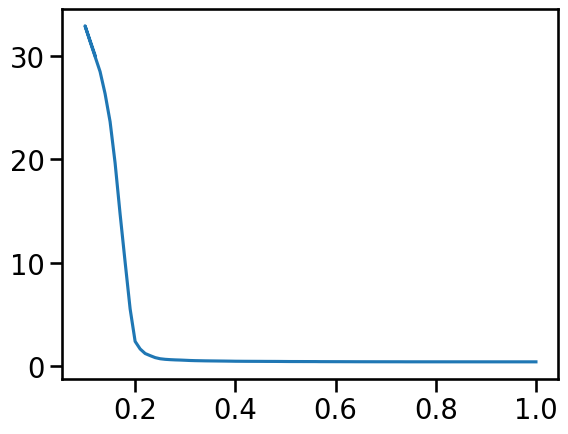

In [10]:
fig, ax = plt.subplots() #creo una figura y divido en pares para dibujar
#plt.style.use("ggplot") #aplico un estilo de graficos
gen_intervals, delays = get_gen_intervals(), get_delays()
ax.plot(gen_intervals, delays)

# Grafico carga util

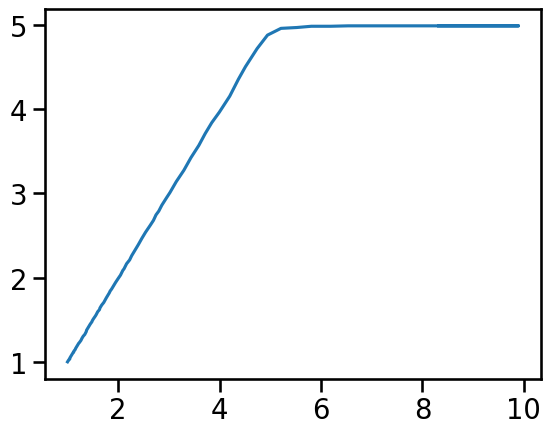

In [14]:
# Calcular la carga útil
def get_cargas(total_time=200):
    paquetes_emisor = get_val_from_col("scalars", "sentPackets")
    paquetes_receptor = get_val_from_col("scalars", "receivedPackets")
    carga_ofrecida = [paquetes/total_time for paquetes in paquetes_emisor]
    carga_util = [paquetes/total_time for paquetes in paquetes_receptor]
    return carga_ofrecida, carga_util
    

fig, ax = plt.subplots() #creo una figura y divido en pares para dibujar

ax.plot(*get_cargas())